# Plotting behavorial data generated by OpenSesame

In the data wrangling tutorial we covered how to import and manipulate a dataframe. We also saw some ways to get an idea how your data looks like by grouping the data. In this tutorial we will go a step further by also visualizing the data. Therefore, we will use python's most widely used visualization package: [matplotlib](https://matplotlib.org/). Let's first load the data. We will use the same data as in the data wrangling tutorial.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# disable chained assignments
pd.options.mode.chained_assignment = None

subj1 = pd.read_csv("data/subject-3.csv", sep=",")
subj2 = pd.read_csv("data/subject-4.csv", sep=",")

df = pd.concat([subj1, subj2], ignore_index=True)

include_columns = ['subject_nr', 'block', 'session', 'congruency_transition_type', 'congruency_type',
                   'correct', 'response_time', 'task_transition_type', 'task_type', 'cue_color']

df_trim = df[include_columns]
df_trim['subject_nr'] = df_trim['subject_nr'].astype('category')
df_trim['correct'] = df_trim['correct'].astype('category')

df_trim_blocks = df_trim[df_trim['block'] < 11]

df_trim_blocks['subject_nr'] = df_trim_blocks['subject_nr'].replace(3, 1)
df_trim_blocks['subject_nr'] = df_trim_blocks['subject_nr'].replace(4, 2)

df_trim_blocks

,subject_nr,block,session,congruency_transition_type,congruency_type,correct,response_time,task_transition_type,task_type,cue_color
0,1,1,lowswitch,NaN,incongruent,0,1482.9738,NaN,parity,#7BB2D0
1,1,1,lowswitch,congruency-switch,congruent,1,706.7057,task-switch,magnitude,#A6A0C6
2,1,1,lowswitch,congruency-repetition,congruent,1,855.6105,task-switch,parity,#7BB2D0
3,1,1,lowswitch,congruency-switch,incongruent,1,867.8947,task-repetition,parity,#CDA277
4,1,1,lowswitch,congruency-repetition,incongruent,1,1078.9412,task-switch,magnitude,#A6A0C6
...,...,...,...,...,...,...,...,...,...,...
811,2,10,highswitch,congruency-switch,incongruent,1,844.0940,task-switch,magnitude,#8FBF35
812,2,10,highswitch,congruency-repetition,incongruent,1,674.5391,task-switch,parity,#A6A0C6
813,2,10,highswitch,congruency-repetition,incongruent,0,789.6114,task-repetition,parity,#7BB2D0
814,2,10,highswitch,congruency-switch,congruent,1,1353.6886,task-switch,magnitude,#CDA277


https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [2]:
print(plt.style.available)
plt.style.use('seaborn')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


First thing to check is how the response time distribution looks like. Many statistical tests assume a normal distribution, but is that the case in our response time distribution as well? Using matplotlib.pyplot we can easily make a histogram plot by specifying the column that should be plotted:

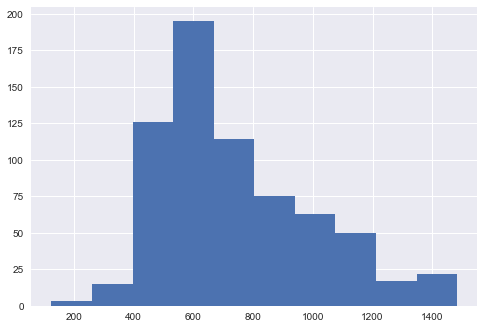

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
fig, ax = plt.subplots()
ax.hist(df_trim_blocks['response_time'])
plt.show()
print(plt.style.available)

That's a good start. However, we are still missing lots of things in this plot. There are no labels for the x- and y-axis, there is no title for the plot, I think we need a few more bins, the graph could be a bit wider, and I am also not happy about the background colour. This is where the real power of matplotlib shows itself: you can customize virtually anything you want in these plots.

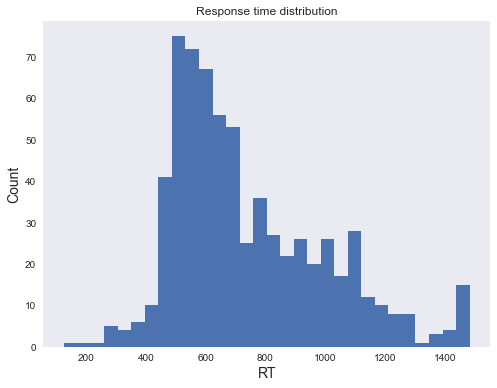

In [4]:
fig, ax = plt.subplots(figsize=(8,6), # Change size to width,height in inches
                       facecolor='grey', # Change background colour to grey
                       frameon=False)

ax.grid(visible=None) # Remove the background grid lines

ax.hist(df_trim_blocks['response_time'],
         bins=30) # Bins defines the amount of bins you want to plot


ax.set_xlabel("RT", size=14) # label on the x-axis, size defines font size
ax.set_ylabel("Count", size=14) # label on the y-axis, size defines font size
ax.set_title("Response time distribution") # title of the plot
plt.show()

We can also make overlays to compare two distributions. Let's for example see how the distribution of correct versus incorrect trials look like.

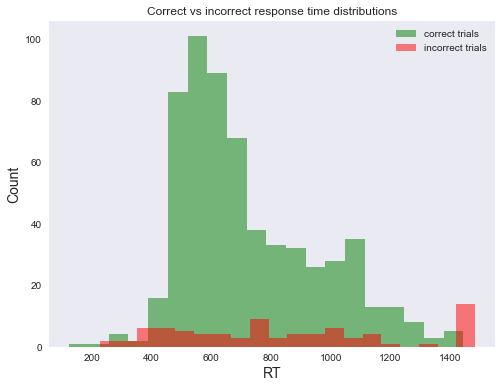

In [5]:
fig, ax = plt.subplots(figsize=(8,6), # Change size to width,height in inches
           facecolor='grey', # Change background colour to grey
           frameon=False) # Remove background behind the bars
ax.grid(visible=None) # Remove the background grid lines

# Here we make two dataframes, one with only correct trials and another with only incorrect trials
correct_trials = df_trim_blocks[df_trim_blocks['correct'] == 1]
incorrect_trials = df_trim_blocks[df_trim_blocks['correct'] == 0]

# Then we make two histograms. Matplotlib will automatically place items you make in the same figure.
ax.hist(correct_trials['response_time'],
         bins=20,
         alpha=0.5, # This defines opacity of the bars
         color='green',
         label="correct trials") # This defines the label that the bar gets, for the legend

ax.hist(incorrect_trials['response_time'],
         bins=20,
         alpha=0.5,
         color='red',
         label="incorrect trials")

ax.set_xlabel("RT", size=14)
ax.set_ylabel("Count", size=14)
ax.set_title("Correct vs incorrect response time distributions")
ax.legend(loc='upper right') # This tells matplotlib to create a legend, and place it on the upper right field of the plot
plt.show()

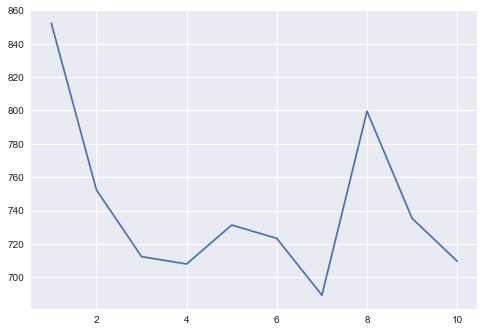

In [6]:
df_block = df_trim_blocks.groupby('block').mean()

plt.plot(df_block)

In [7]:

#df.head()

#df['acc']
#df.acc

#df.iloc[1]

#print(df['congruency'])

#df.shape

#dfg = df.groupby('subject_nr')
#dfg.mean()

#df.groupby('subject_nr').agg([np.sum, np.mean, np.std])


df['rt_zscore'] = df.groupby(['subject_nr','congruency'])['response_time'].transform(lambda x: (x-x.mean())/x.std())

print(df)


KeyError: 'congruency'

In [8]:
plt.figure(figsize=(8,6));
plt.hist(df.query("congruency == 'inc' & rt_zscore <= 3").response_time, bins=100, alpha=0.5, label="data1");
plt.hist(df.query("congruency == 'inc' & rt_zscore > 3").response_time, bins=100, alpha=0.5, label="data2");

UndefinedVariableError: name 'congruency' is not defined

<Figure size 576x432 with 0 Axes>

In [9]:
import seaborn as sns

df['is_outlier'] = df['rt_zscore'] > 3

sns.set_theme(style="darkgrid")
sns.displot(
    df.query("subject_nr != 0"), x="response_time", col="congruency", row="subject_nr",
    binwidth=10, height=3, facet_kws=dict(margin_titles=True), hue = "is_outlier",
)

ModuleNotFoundError: No module named 'seaborn'

In [10]:
df

,EEG,ET,acc,accuracy,average_response_time,avg_rt,background,baseline_measurement,bidi,block,...,time_wrong_response_feedback,title,total_correct,total_response_time,total_responses,trialnr,uniform_coordinates,width,correct_summary_feedback_repeat_parity,correct_summary_feedback_repeat_paritymagnitude
0,1,1,0.000000,0.000000,1482.973800,1482.973800,#ABACB0,1,yes,1,...,3.556749e+06,Parity-magnitude task with teufel colors,0,1482.9738,1,1,yes,1680,NaN,NaN
1,1,1,50.000000,50.000000,1094.839750,1094.839750,#ABACB0,1,yes,1,...,3.556749e+06,Parity-magnitude task with teufel colors,1,2189.6795,2,2,yes,1680,NaN,NaN
2,1,1,66.666667,66.666667,1015.096667,1015.096667,#ABACB0,1,yes,1,...,3.556749e+06,Parity-magnitude task with teufel colors,2,3045.2900,3,3,yes,1680,NaN,NaN
3,1,1,75.000000,75.000000,978.296175,978.296175,#ABACB0,1,yes,1,...,3.556749e+06,Parity-magnitude task with teufel colors,3,3913.1847,4,4,yes,1680,NaN,NaN
4,1,1,80.000000,80.000000,998.425180,998.425180,#ABACB0,1,yes,1,...,3.556749e+06,Parity-magnitude task with teufel colors,4,4992.1259,5,5,yes,1680,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,1,1,79.358717,79.358717,1032.506916,1032.506916,#ABACB0,1,yes,12,...,3.080682e+06,Parity-magnitude task with teufel colors,396,515220.9512,499,61,yes,1680,0.0,0.0
948,1,1,79.400000,79.400000,1031.607870,1031.607870,#ABACB0,1,yes,12,...,3.080682e+06,Parity-magnitude task with teufel colors,397,515803.9349,500,62,yes,1680,0.0,0.0
949,1,1,79.441118,79.441118,1031.008570,1031.008570,#ABACB0,1,yes,12,...,3.080682e+06,Parity-magnitude task with teufel colors,398,516535.2935,501,63,yes,1680,0.0,0.0
950,1,1,79.482072,79.482072,1029.826639,1029.826639,#ABACB0,1,yes,12,...,3.080682e+06,Parity-magnitude task with teufel colors,399,516972.9729,502,64,yes,1680,0.0,0.0


In [11]:
df_sum = df.query("rt_zscore <= 3").groupby(['subject_nr','congruency'])['response_time'].mean()

UndefinedVariableError: name 'rt_zscore' is not defined

In [12]:
df_sum

NameError: name 'df_sum' is not defined